In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed = 42

# Diagnozowanie cukrzycy

### Zdefiniowanie problemu

Celem jest stworzenie modelu predykcyjnego diagnozowania cukrzycy. Model powinien przywidywać czy pacjent ma cukrzycę (Outcome = 2), stan przedcukrzycowy (Outcome = 1), czy nie ma cukrzycy (Outcome = 0).

### Opis danych

| Column Name           | Description                                      |
|:----------------------|:-------------------------------------------------|
| Diabetes_012          | 0 = no diabetes 1 = prediabetes 2 = diabetes     |
| HighBP                | 0 = no high BP 1 = high BP                       |
| HighChol              | 0 = no high cholesterol 1 = high cholesterol|
| CholCheck             | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years|
| BMI                   | Body Mass Index|
| Smoker                | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes|
| Stroke                | (Ever told) you had a stroke. 0 = no 1 = yes
| HeartDiseaseorAttack  | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
| PhysActivity          | physical activity in past 30 days - not including job 0 = no 1 = yes
| Fruits                | Consume Fruit 1 or more times per day 0 = no 1 = yes
| Veggies               | Consume Vegetables 1 or more times per day 0 = no 1 = yes
| HvyAlcoholConsump     | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
| AnyHealthcare         | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
| NoDocbcCost           | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
| GenHlth               | Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
| MentHlth              | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
| PhysHlth              | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
| DiffWalk              | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
| Sex                   | 0 = female 1 = male
| Age                   | 13-level age category (AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
| Education             | Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
| Income                | Income scale (INCOME2 see codebook) scale 1-8 1 = less than 10,000 5 = less than 35,000 8 = 75,000 or more



### EDA

In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.shape

(253680, 22)

In [6]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Wnioski: Zestaw nie zawiera brakujących wartości

In [8]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


Wnioski: Duża liczba zmiennych przyjmuje wartości binarne (0 lub 1)

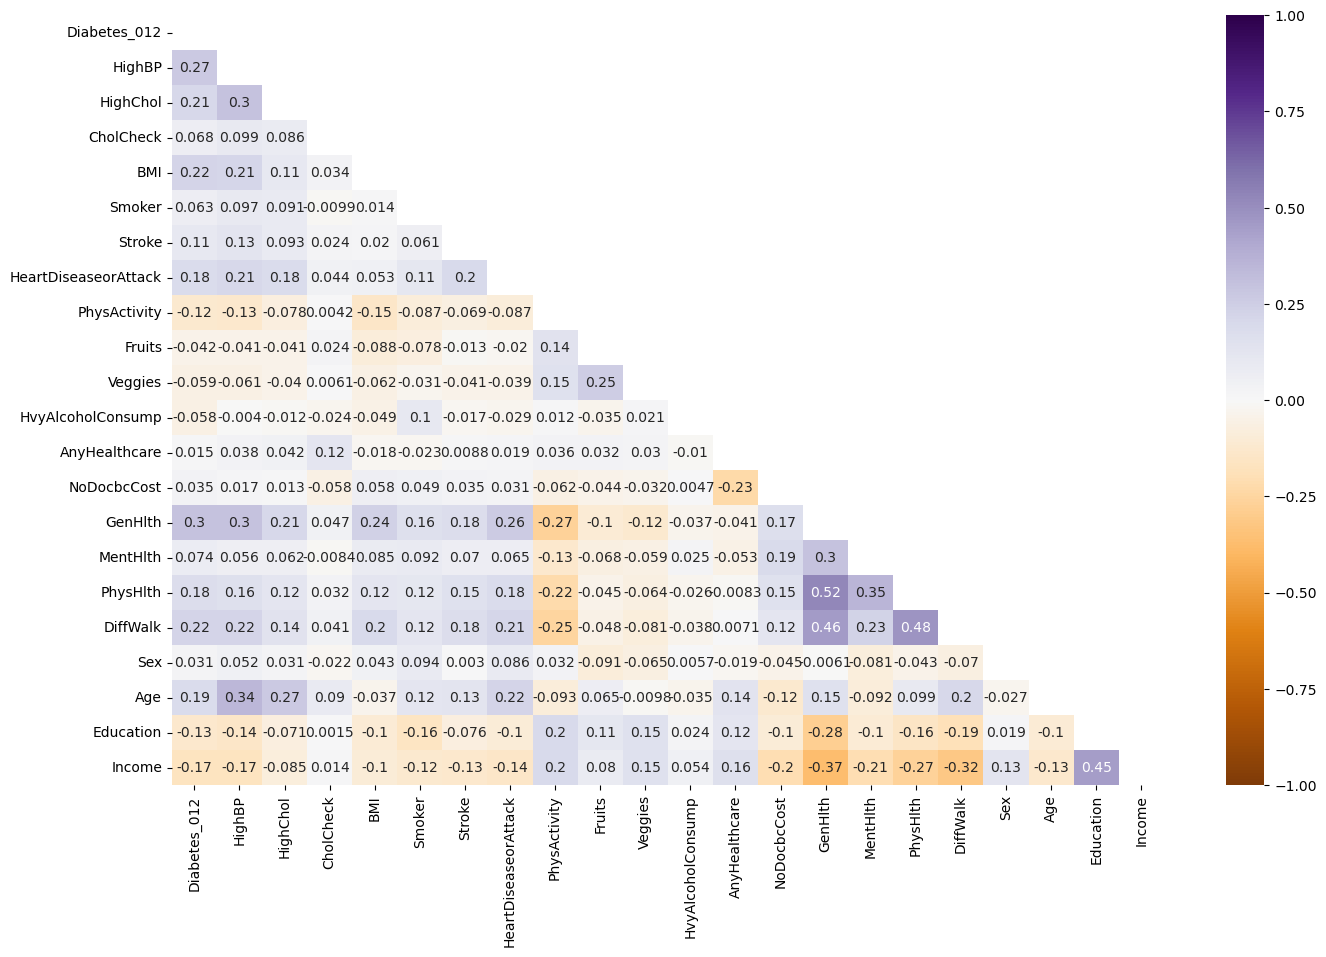

In [28]:
num_features = [name for name in df.columns if pd.api.types.is_numeric_dtype(df[name])]
plt.figure(figsize=(16, 10))
mask = np.triu(df[num_features].corr())
heatmap = sns.heatmap(df[num_features].corr(), annot=True, vmin=-1, vmax=1, cmap="PuOr", mask=mask)
plt.show()

Wnioski: Nasilniej skorelowane zmienne w zestawie danych 

* &rho;(PhysHlth, GenHlth) = 0.52 

* &rho;(PhysHlth, DiffWalk) = 0.48 

* &rho;(GenHlth, DiffWalk) = 0.46 

* &rho;(Income, Education) = 0.45 

Zmienną najsilniej skorelowaną ze zmienną celu jest GenHlth, &rho;(GenHlth, Diabetes_012) = 0.3

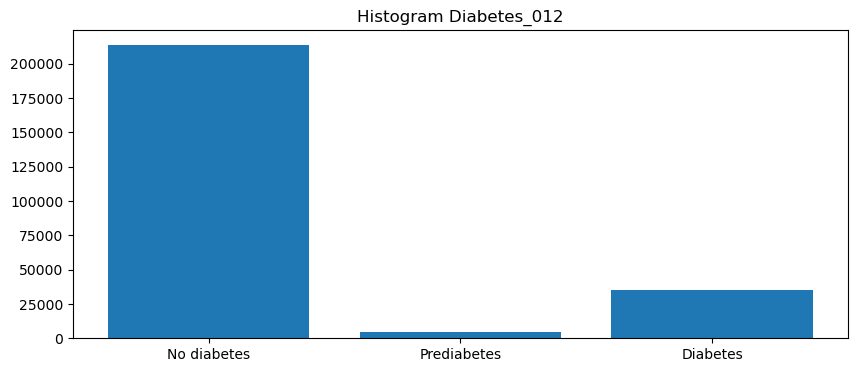

In [10]:
plt.figure(figsize=(10, 4))
plt.hist(df['Diabetes_012'], bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8)
plt.title('Histogram Diabetes_012')
plt.xticks([0, 1, 2], ['No diabetes', 'Prediabetes', 'Diabetes'])

plt.show()

Opis: Rozkład zmiennej celu

#### Podział na kolumny binarne i numeryczne

In [11]:
df_bool = df.drop(['BMI', "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"], axis=1).reset_index(drop = True)
df_bool.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
df_num = df.drop(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'], axis=1).reset_index(drop = True)
df_num.head()

,Diabetes_012,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,0.0,40.0,5.0,18.0,15.0,9.0,4.0,3.0
1,0.0,25.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,28.0,5.0,30.0,30.0,9.0,4.0,8.0
3,0.0,27.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,24.0,2.0,3.0,0.0,11.0,5.0,4.0


#### Analiza kolumn binarnych

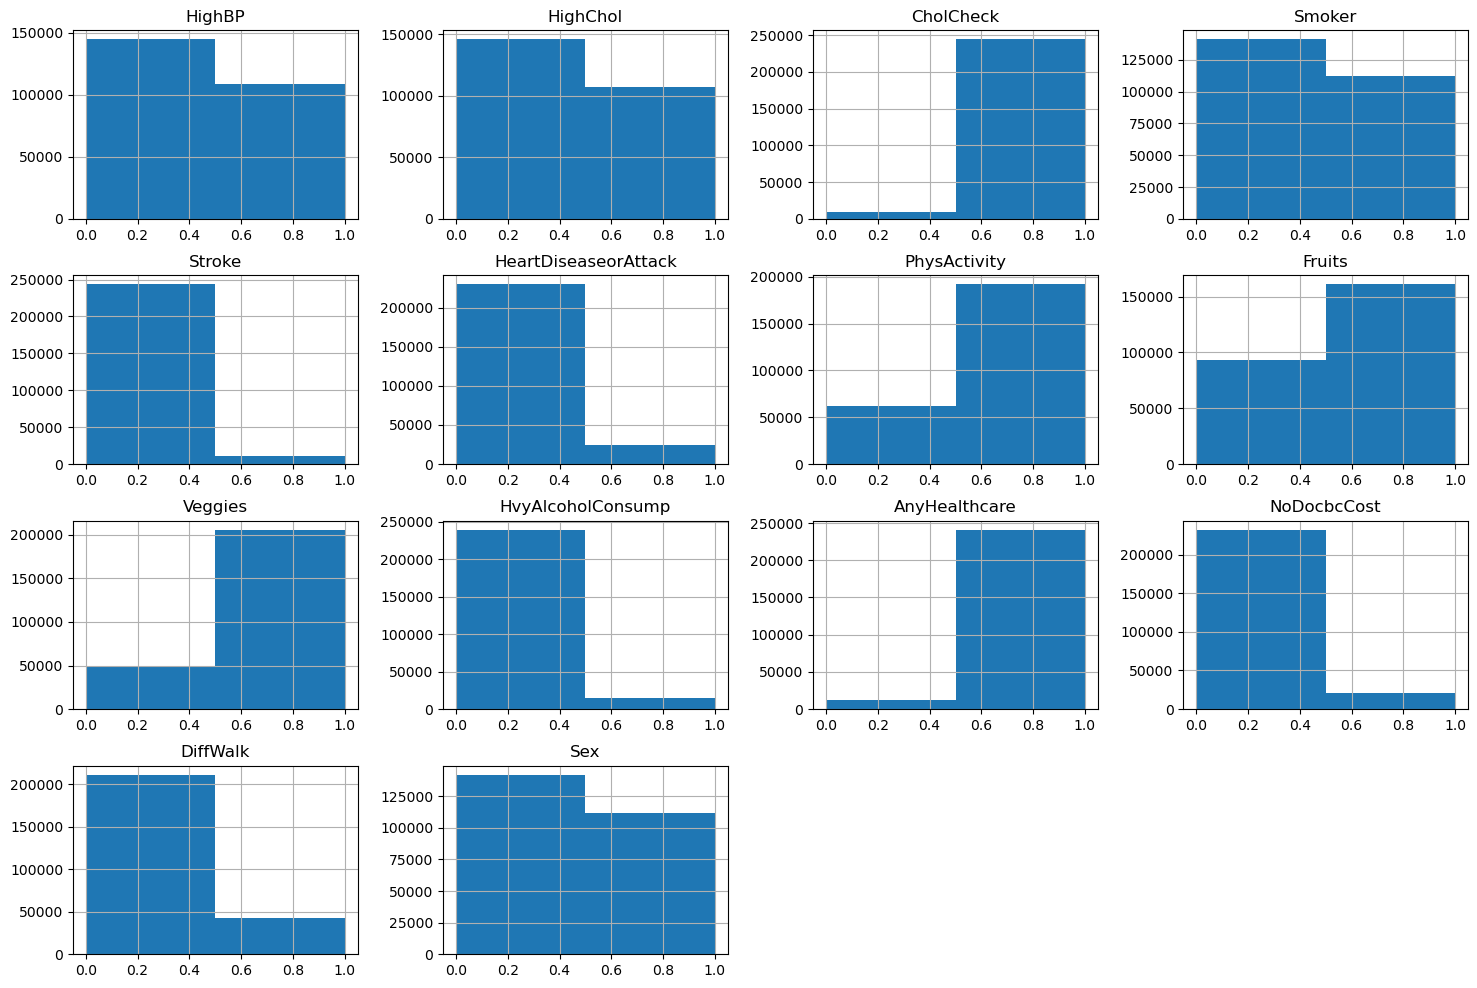

In [13]:
df_bool1 = df_bool.drop(['Diabetes_012'], axis=1).reset_index(drop = True)
df_bool1.hist(bins = 2, figsize=(18, 12))
plt.show()

In [14]:
bi_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
df_bool["ind"] = range(0,len(df_bool["HighBP"]))
b = df_bool.groupby(["Diabetes_012"], as_index = False)["ind"].count()
b["all_by_diab"]= b["ind"]
b = b.drop(["ind"],axis=1)

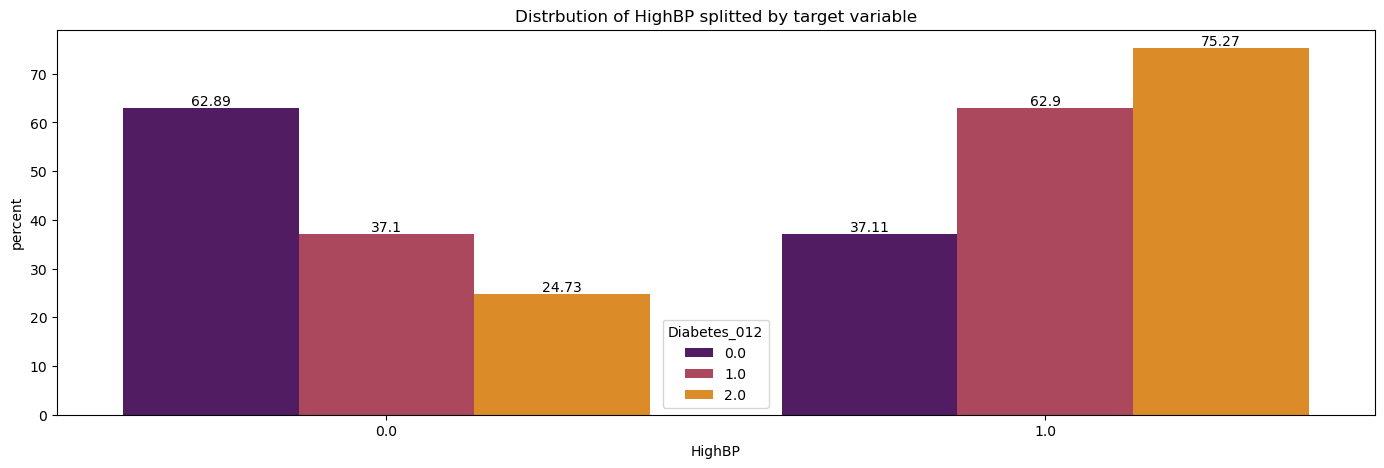

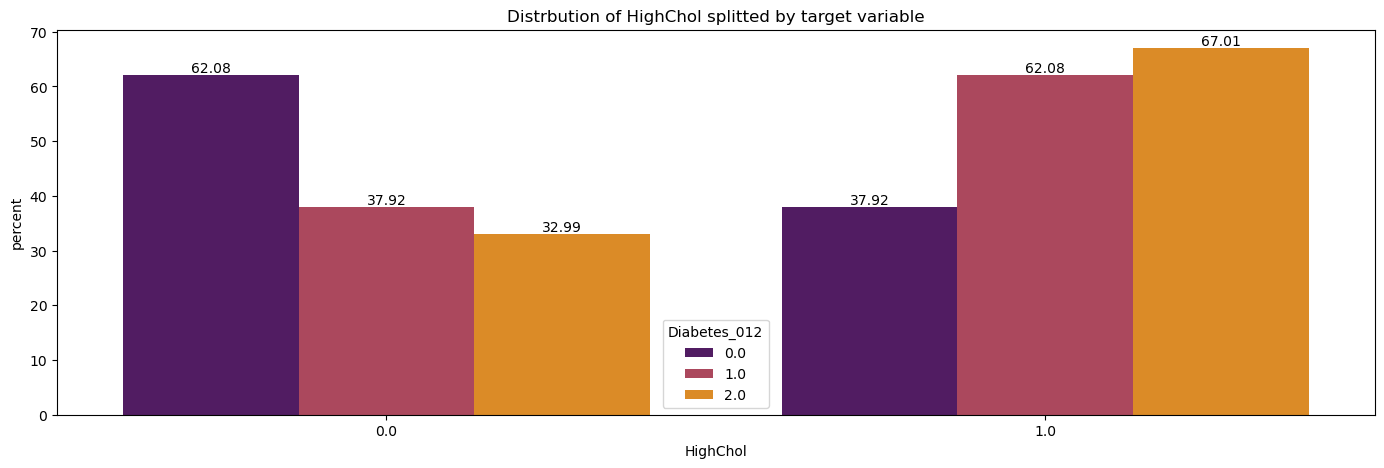

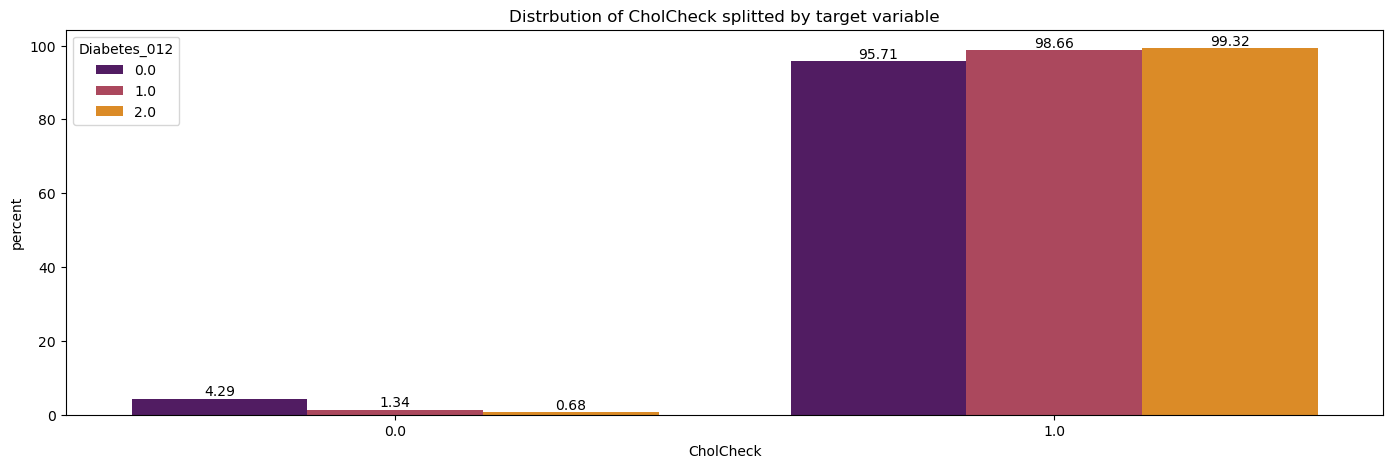

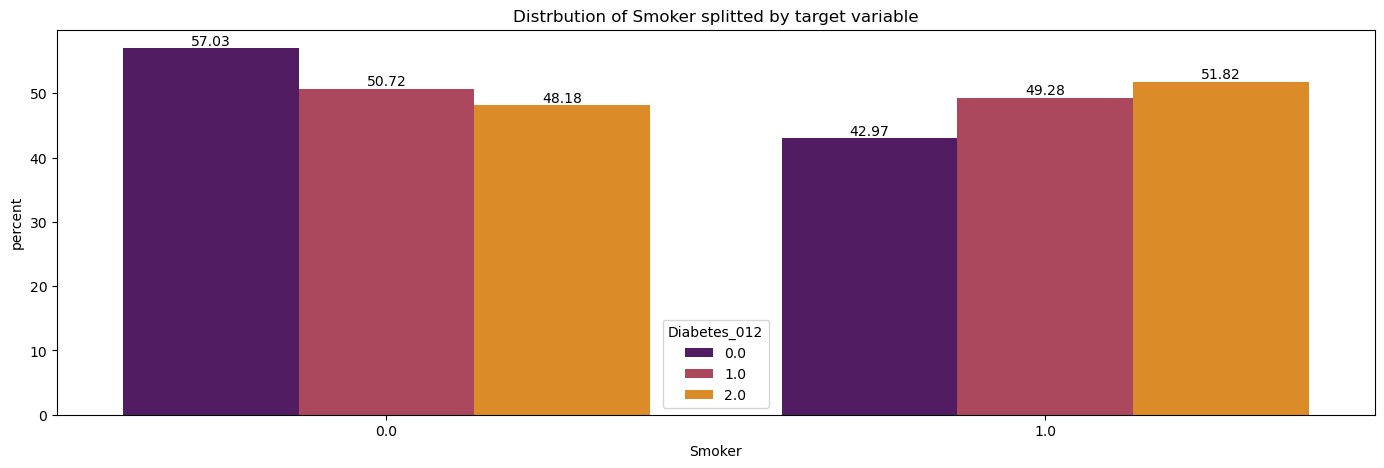

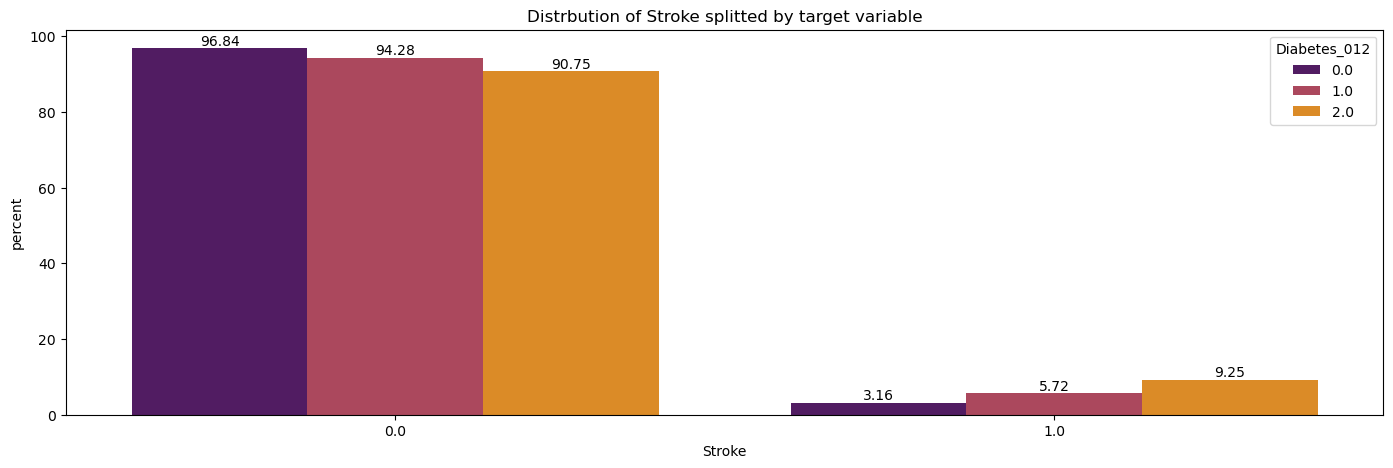

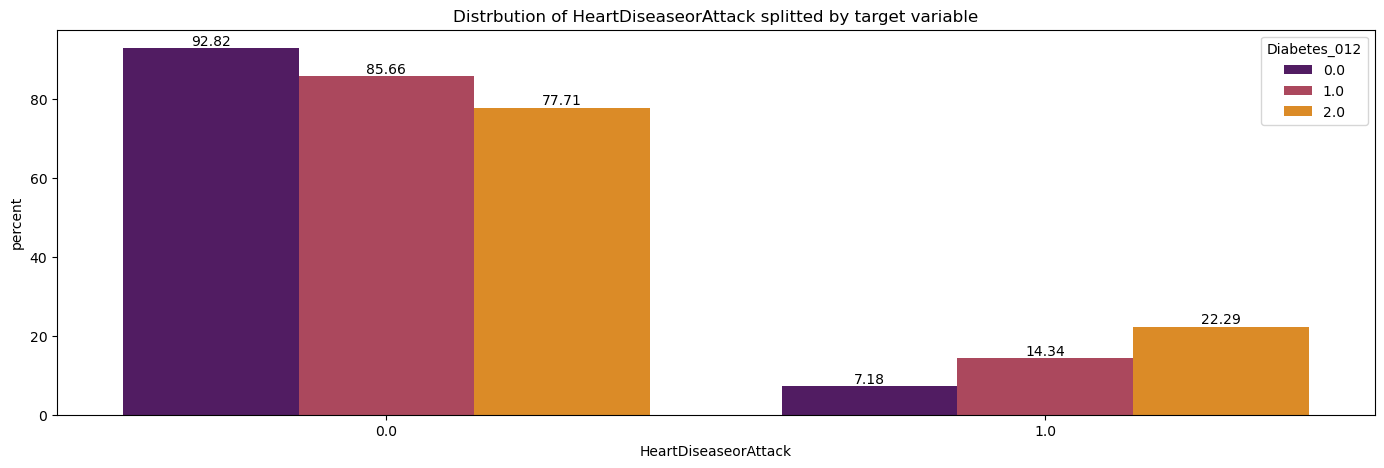

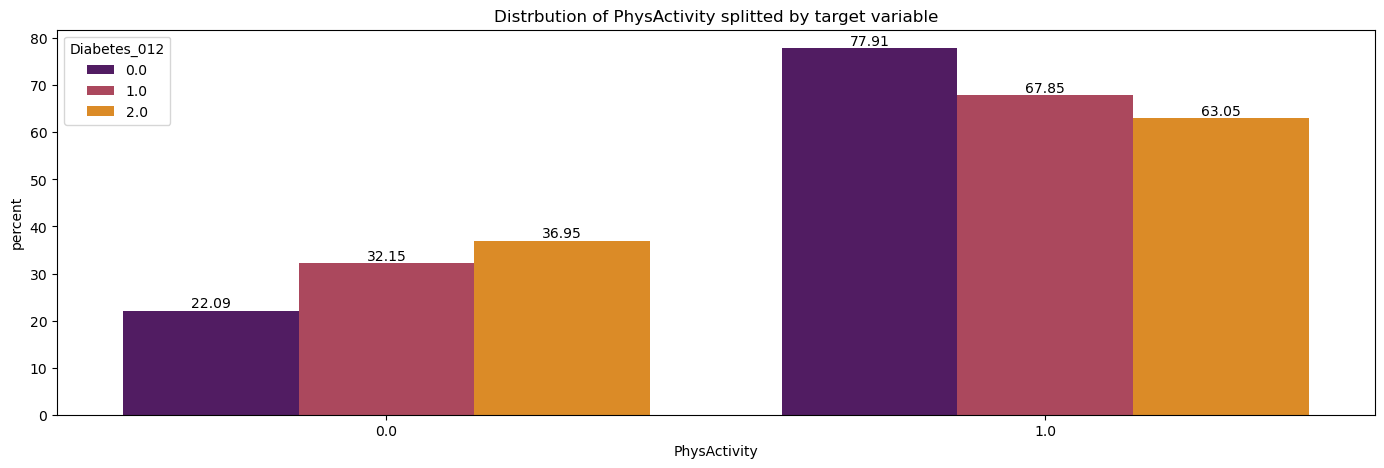

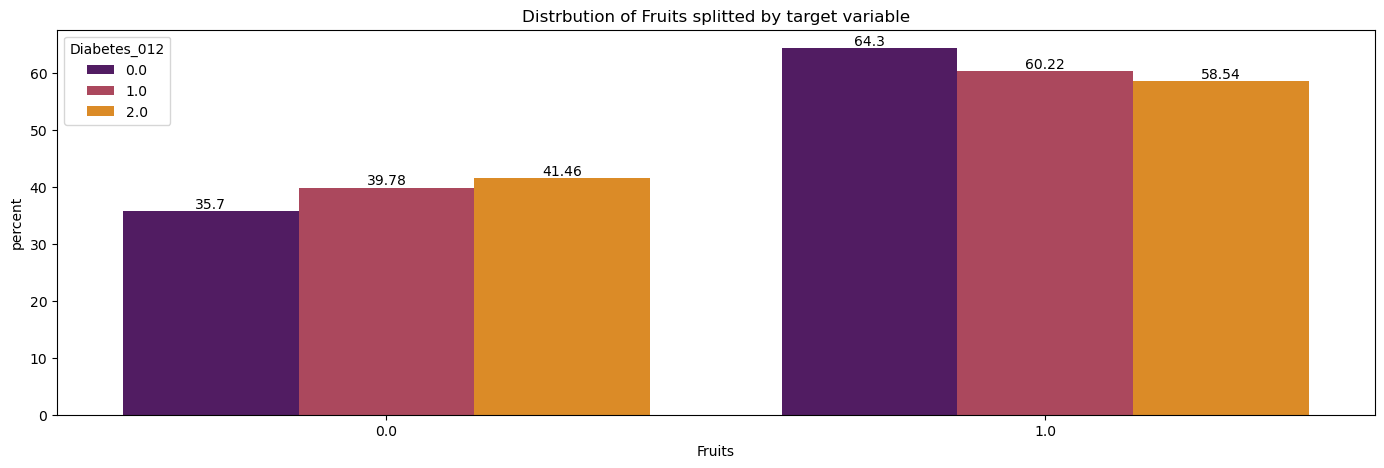

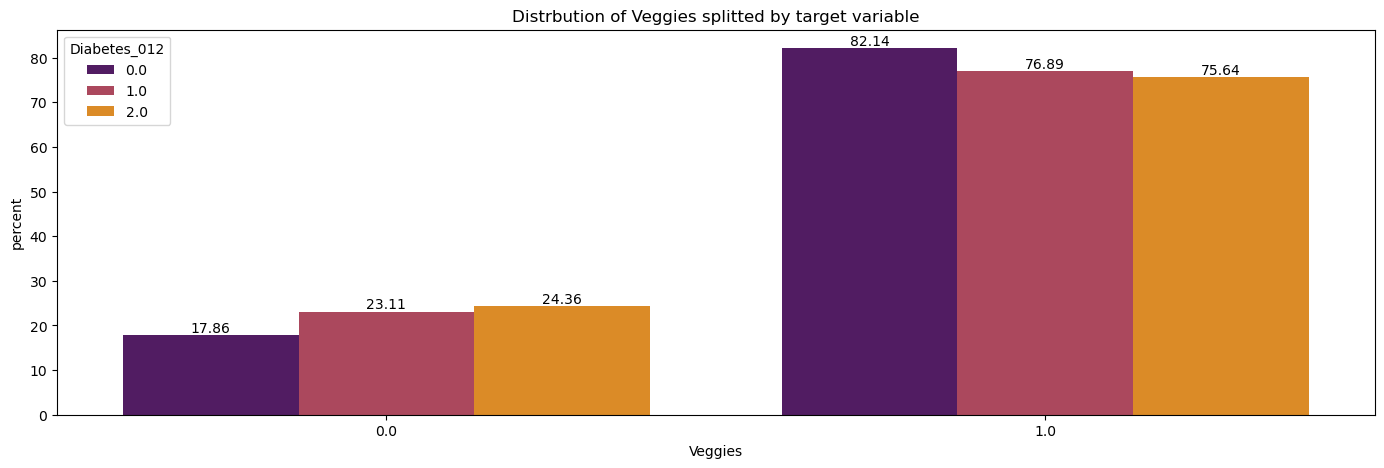

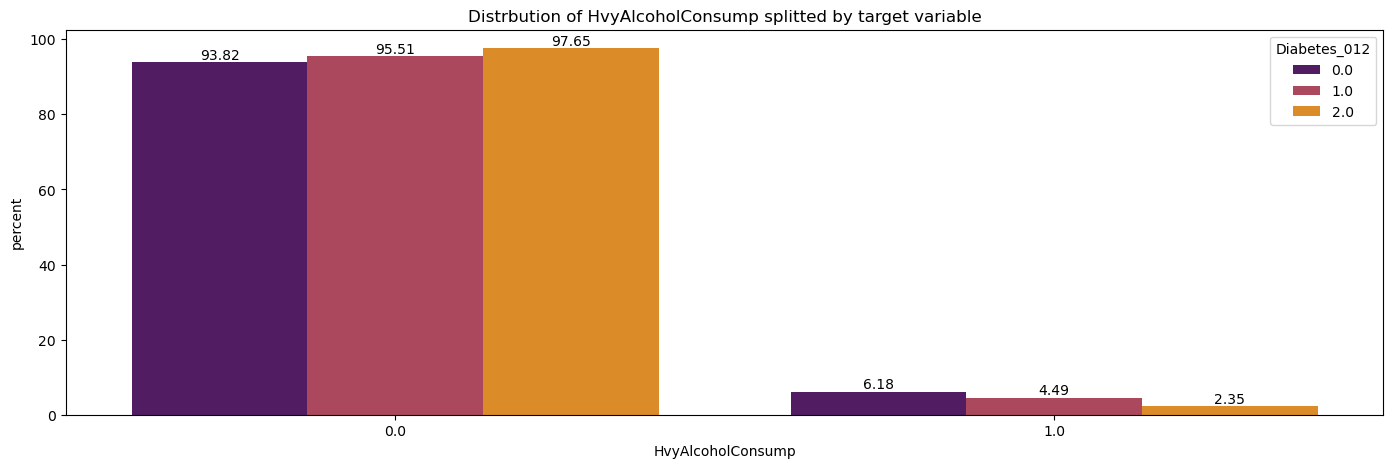

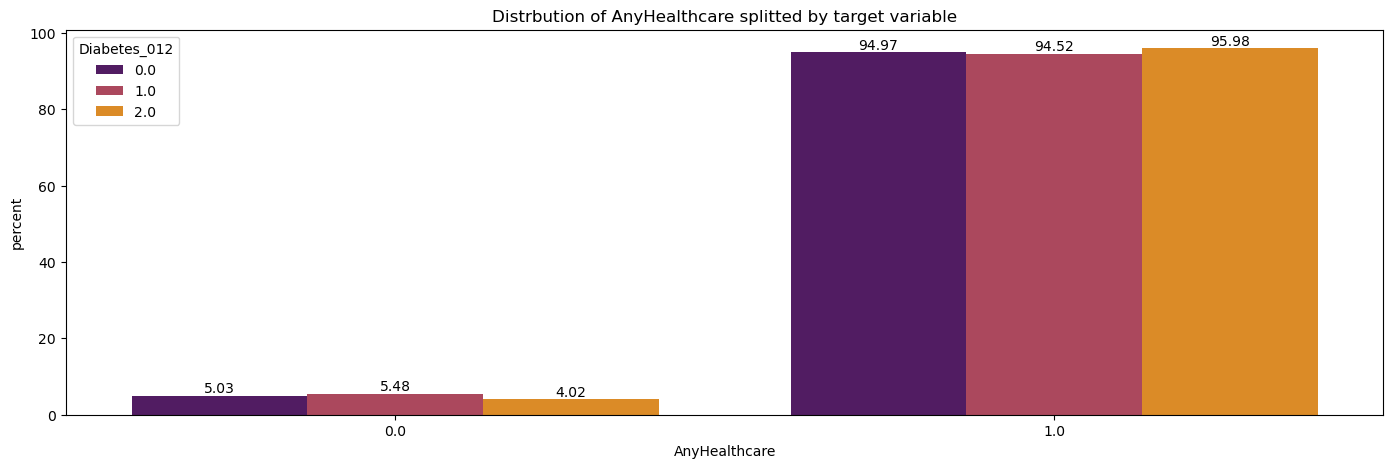

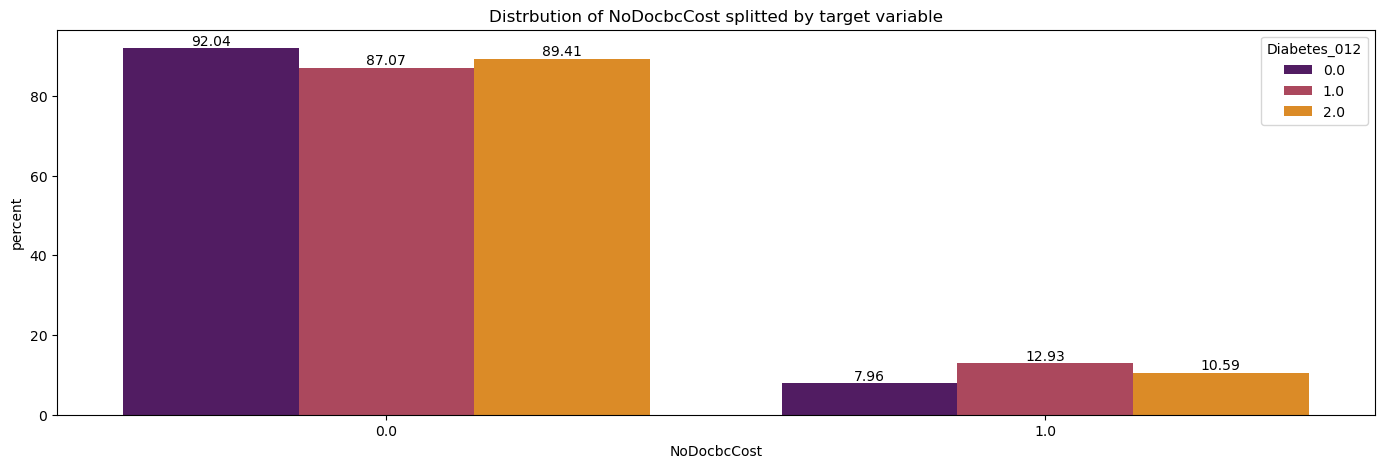

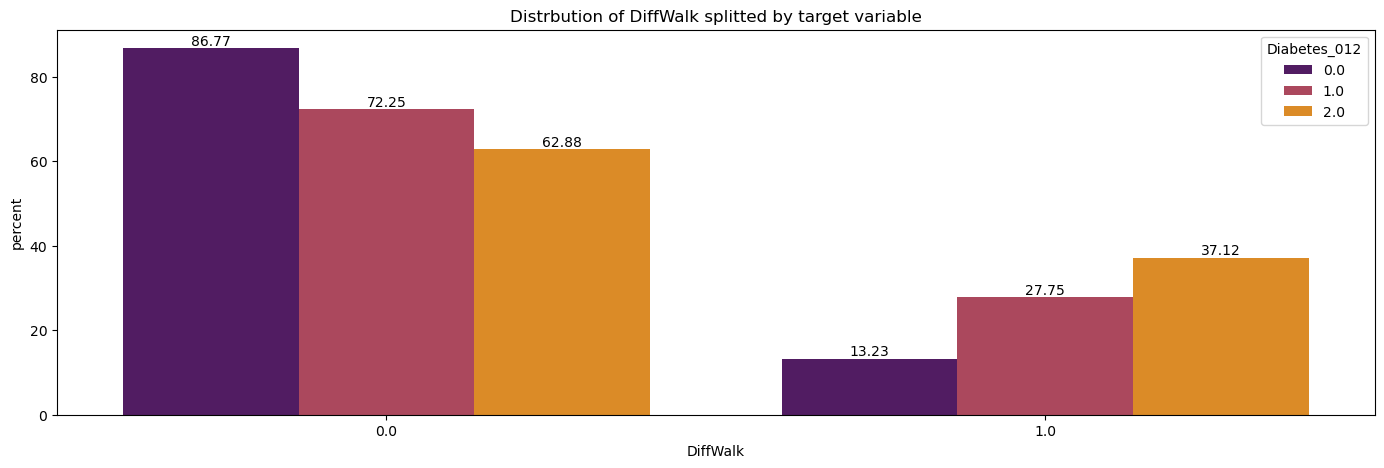

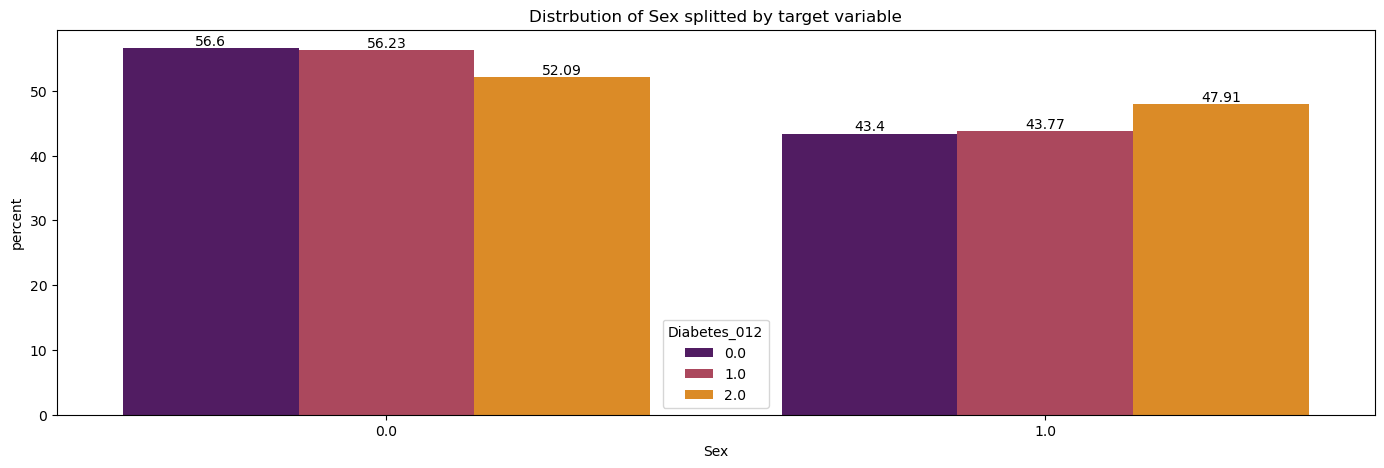

In [15]:
for col in bi_cols:
    plt.figure(figsize=(17, 5))
    
    a = df_bool.groupby(["Diabetes_012", col], as_index = False)["ind"].count()
    a["count"]= a["ind"]
    a = a.drop(["ind"],axis=1)
    
    c = a.merge(b, on="Diabetes_012", how="left")

    d = c.assign(percent = round(100*c["count"]/c["all_by_diab"], 2))

    ax = sns.barplot(x=d[col], y=d["percent"], data=d, palette='inferno', hue=d["Diabetes_012"])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

Opis: Powyższe wykresy słupkowe przedstawiają w jakich proporcjach (procentowo) dzieli się każda z unikalnych wartości zemiennej celu. 

Wnioski:

* HighBP – ponad 60% osób bez cukrzycy nie ma wysokiego ciśnienia 
* Ponad 75% osób z cukrzycą ma wysokie ciśnienie
* HighChol - ponad 60% osób bez cukrzycy nie ma wysokiego cholesterolu 
* Trudności z chodzeniem częściej występują u osób z cukrzycą
* Niedokrwienie mięśnia sercowego i choroba wieńcowa częściej występują u osób z cukrzycą
* Osoby bez aktywności fizycznej częściej mają cukrzycę 

#### Analiza kolumn numerycznych

In [16]:
df_num["BMI_10"] = 10*(df_num["BMI"]//10)
df_num["MentHlth_10"] = 10*(df_num["MentHlth"]//10)
df_num["PhysHlth_10"] = 10*(df_num["PhysHlth"]//10)

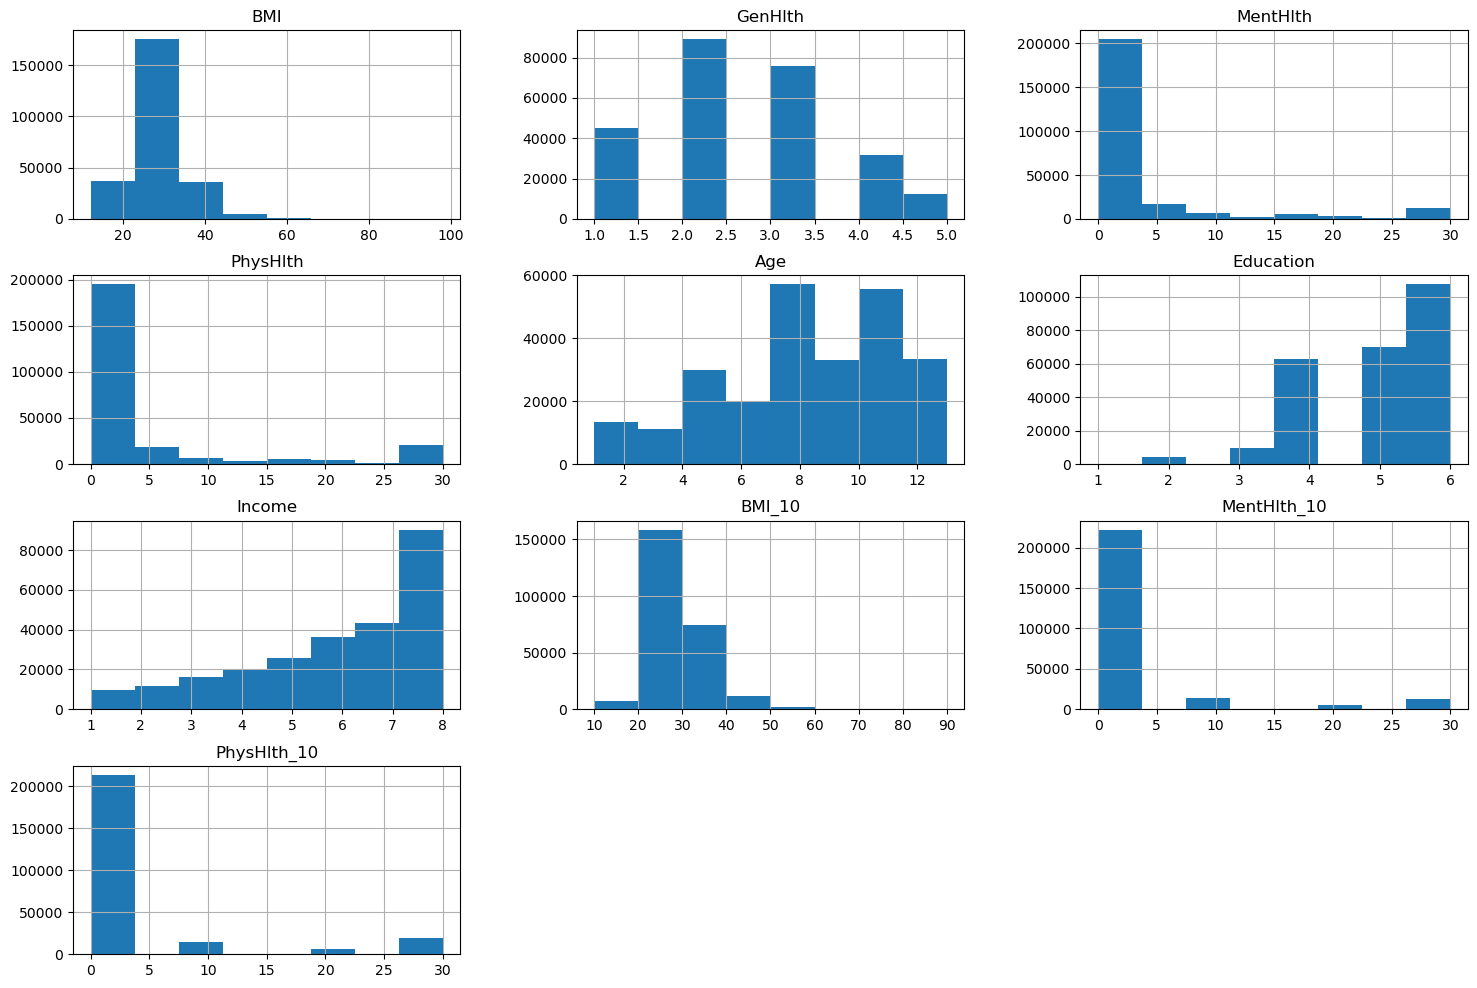

In [17]:
df_num1 = df_num.drop(['Diabetes_012'], axis=1).reset_index(drop = True)
df_num1.hist(bins = 8, figsize=(18, 12))
plt.show()

In [18]:
df_num["ind"] = range(0,len(df_num["Education"]))
cat_cols = ["GenHlth", "Age", "Education", "Income", "BMI_10", "PhysHlth_10", "MentHlth_10"]
b = df_num.groupby(["Diabetes_012"], as_index = False)["ind"].count()
b["all_by_diab"]= b["ind"]
b = b.drop(["ind"],axis=1)

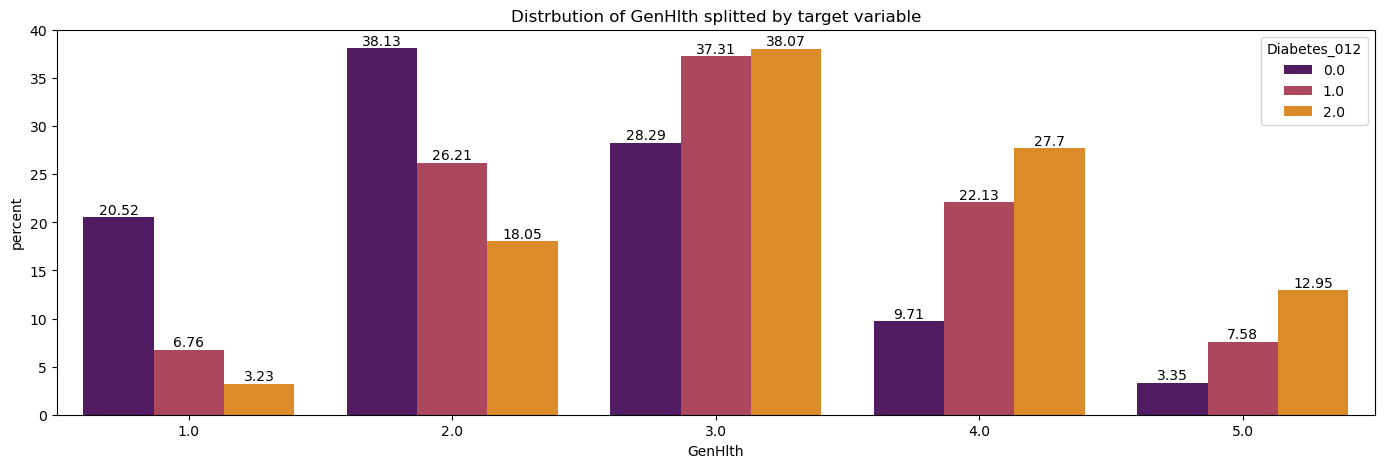

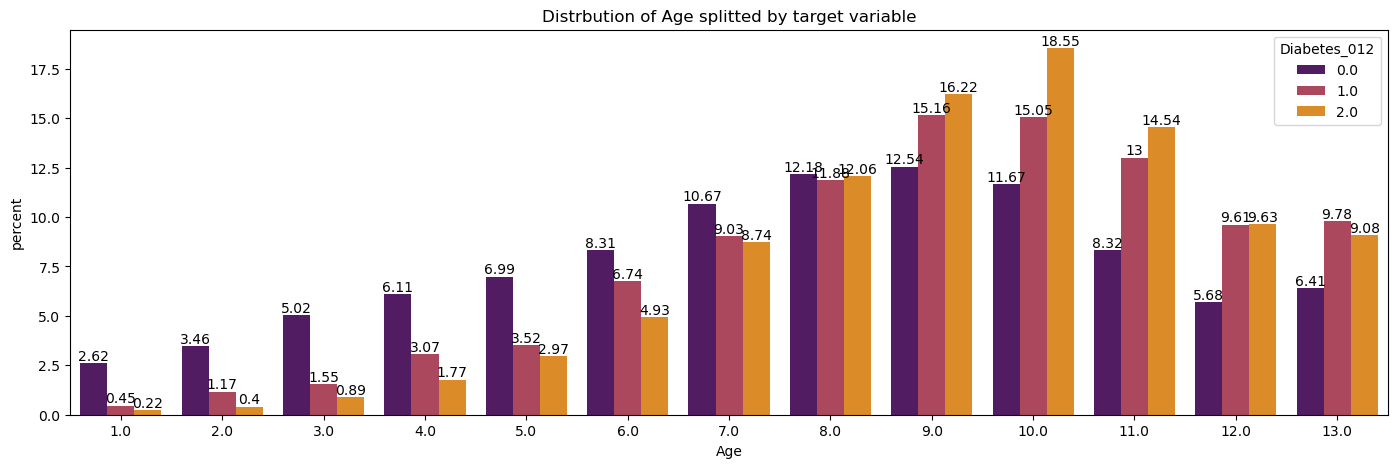

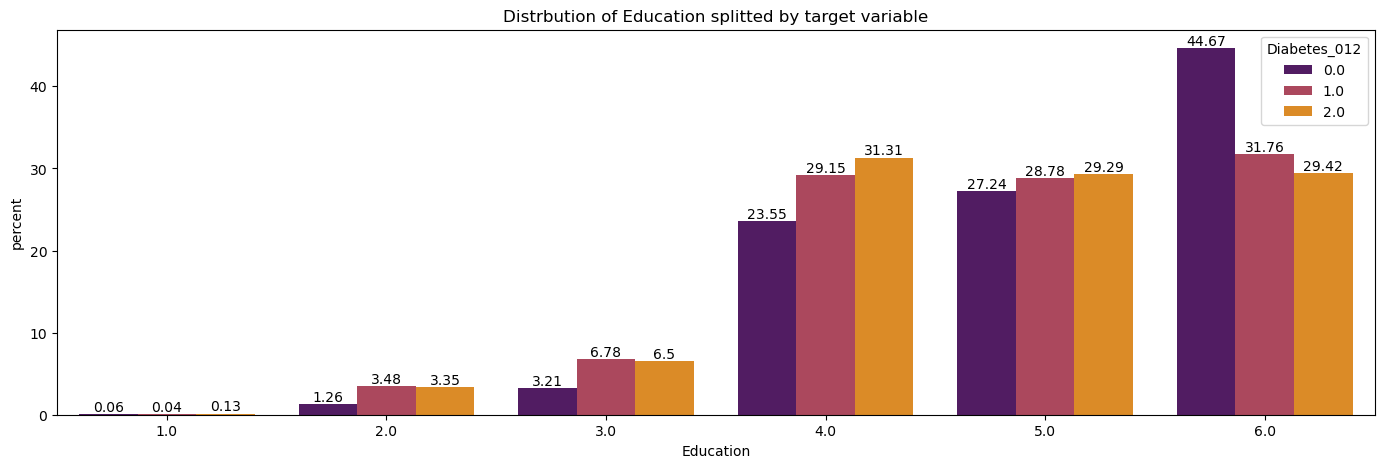

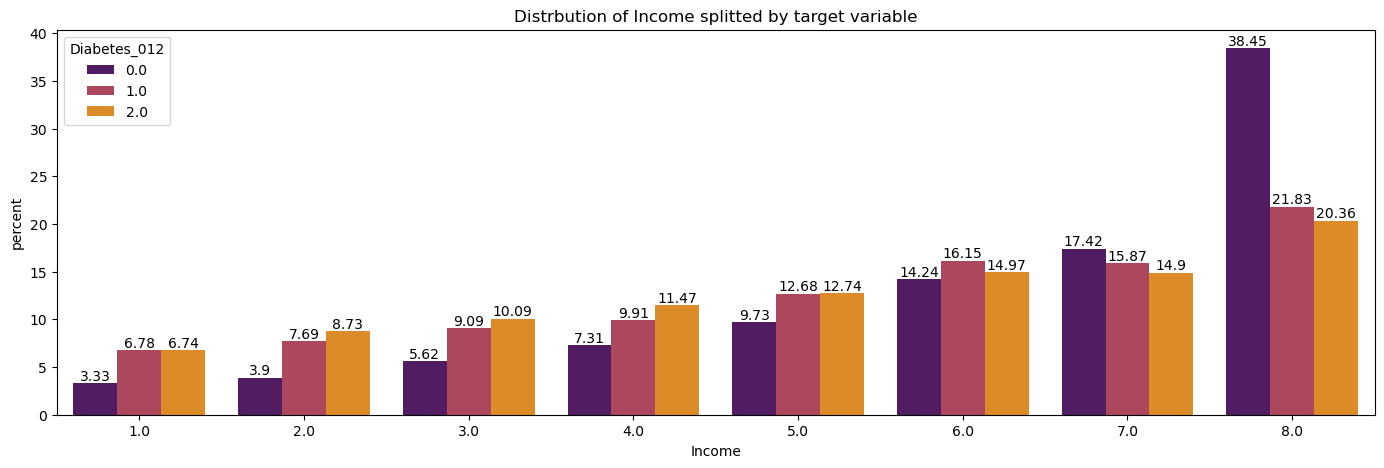

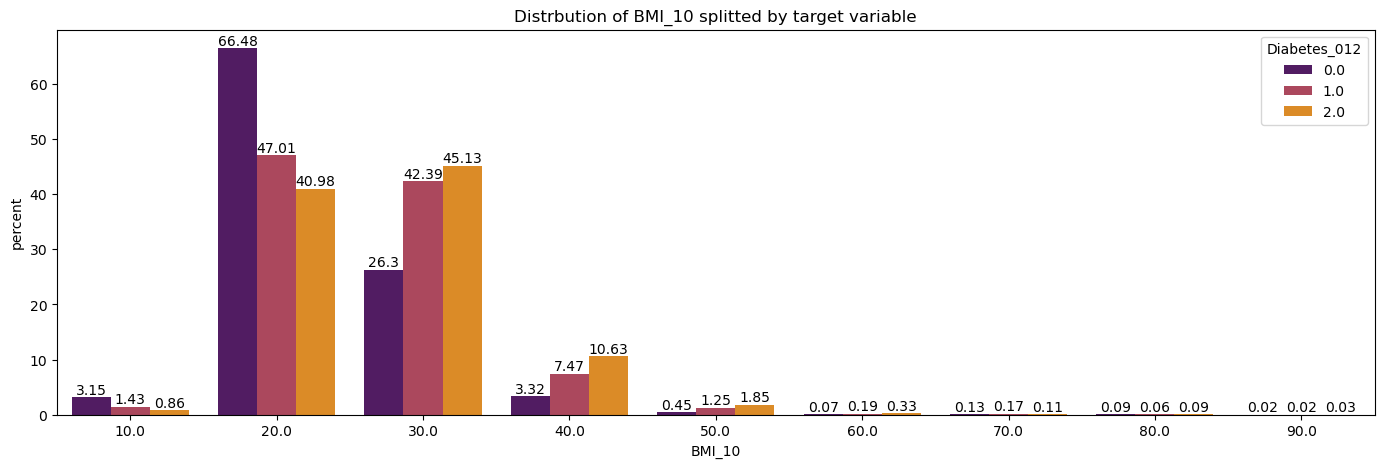

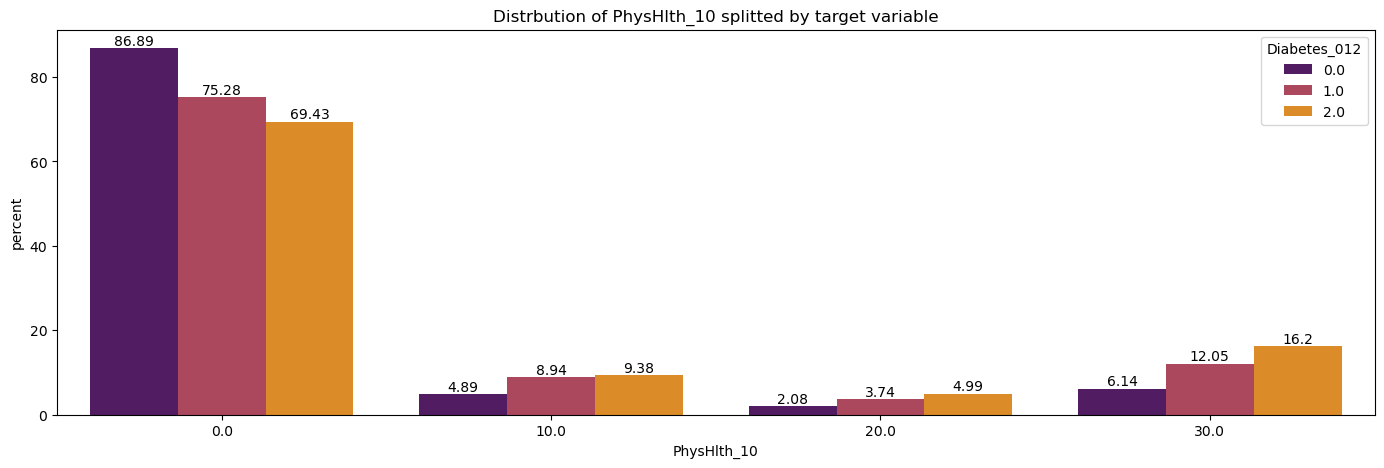

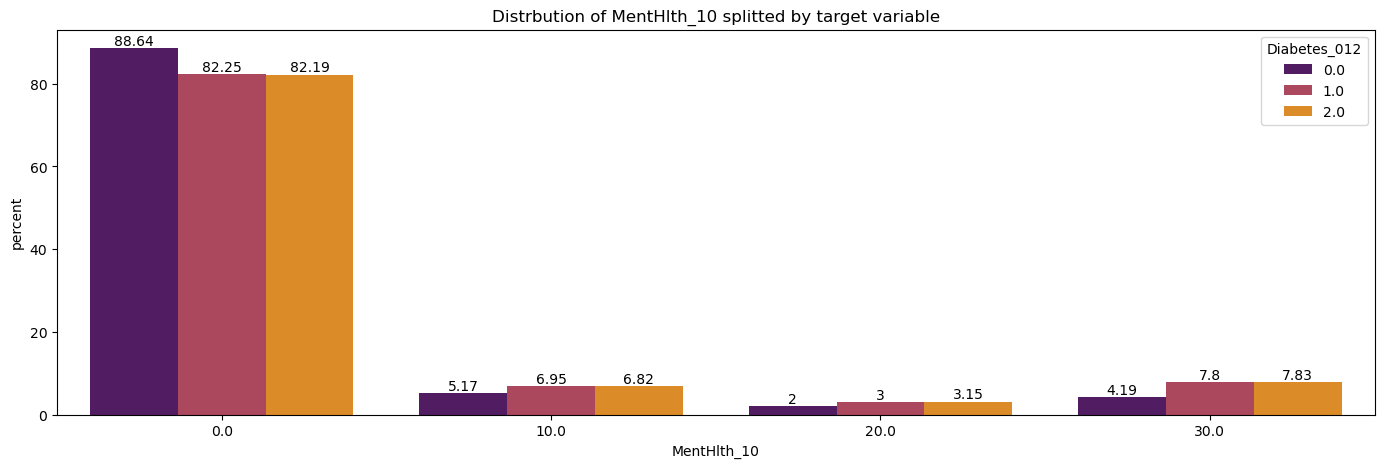

In [19]:
for col in cat_cols:
    plt.figure(figsize=(17, 5))
    
    a = df_num.groupby(["Diabetes_012", col], as_index = False)["ind"].count()
    a["count"]= a["ind"]
    a = a.drop(["ind"],axis=1)
    
    c = a.merge(b, on="Diabetes_012", how="left")

    d = c.assign(percent = round(100*c["count"]/c["all_by_diab"], 2))

    ax = sns.barplot(x=d[col], y=d["percent"], data=d, palette='inferno', hue=d["Diabetes_012"])
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    ax.bar_label(ax.containers[2])
    
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

Opis: Powyższe wykresy słupkowe przedstawiają w jakich proporcjach (procentowo) dzieli się każda z unikalnych wartości zemiennej celu. 

Wnioski:
* Age – ok. 55% osób bez cukrzycy ma poniżej 59 lat, ponad 65% osób z cukrzycą ma więcej niż 59 lat
* Education – ok. 45% osób bez cukrzycy ma wyższe wykształcenie (Education = 6)
* Income - ok. 40% osób bez cukrzycy zarabia ponad 75 000
* BMI_10 - ok. 65% osób bez cukrzycy ma indeks BMI z zakresu (20, 30)
* GenHlth – ponad 85% osób bez cukrzycy ocenia swoje zdrowie jako co najmniej dobre, ponad 40% osób z cukrzycą ocenia swoje zdrowie jako przeciętne lub słabe


In [20]:
num_cols = ['BMI', "MentHlth", "PhysHlth"]
b = df_num.groupby(["Diabetes_012"], as_index = False)["ind"].count()
b["all_by_diab"]= b["ind"]
b = b.drop(["ind"],axis=1)

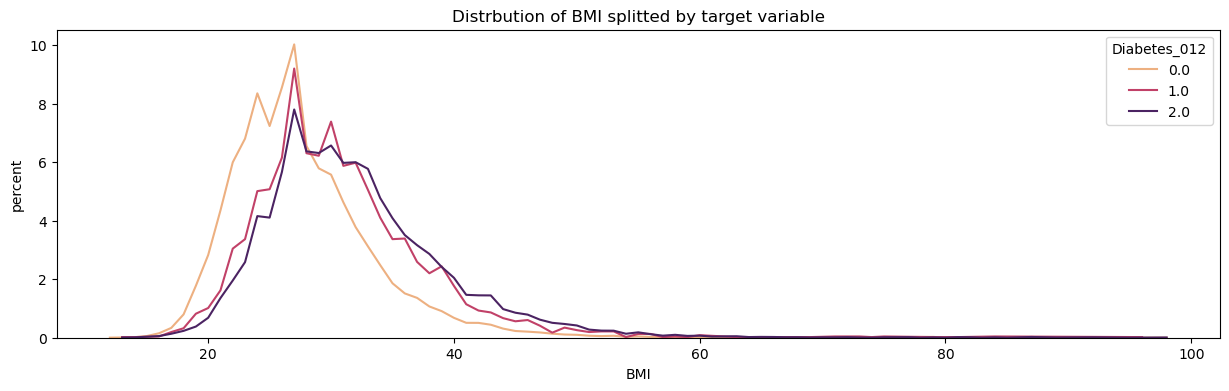

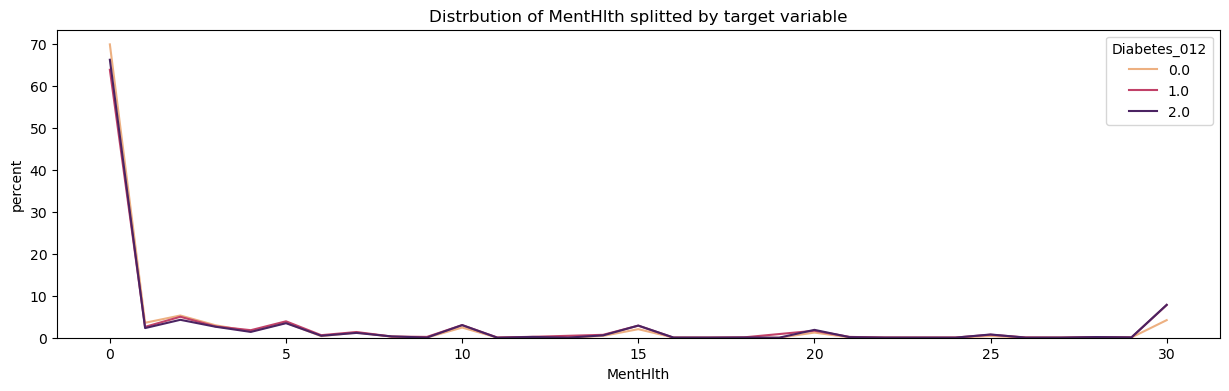

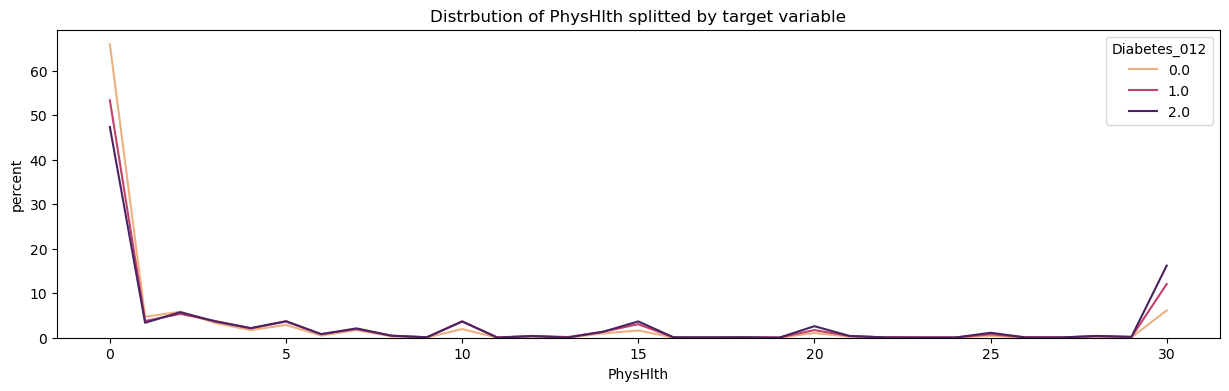

In [25]:
for col in num_cols:
    plt.figure(figsize=(15, 4))
    
    a = df_num.groupby(["Diabetes_012", col], as_index = False)["ind"].count()
    a["count"]= a["ind"]
    a = a.drop(["ind"],axis=1)
    
    c = a.merge(b, on="Diabetes_012", how="left")

    d = c.assign(percent = 100*c["count"]/c["all_by_diab"])

    ax = sns.lineplot(x=d[col], y=d["percent"], data=d, palette='flare', hue=d["Diabetes_012"])
    plt.ylim(0, None)

    
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

Wnioski: Osoby posiadające cukrzyce mają większe BMI

### Train, Validation and Test Sets

In [22]:
y = np.array(df['Diabetes_012'])
X = df.drop(['Diabetes_012'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42)